# Pandas

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

### Series

In [ ]:
labels = ['a','b','c']
data = [10, 20,30]
arr = np.array(data)
dic = {'a': 10, 'b': 20, 'c': 30}

In [ ]:
pd.Series(data = data)    # will create a pandas series with index 0 to n and data in it

In [ ]:
pd.Series(data = data, index = labels) # will create a pandas series with index as labels(a,b,c) and data in it

In [ ]:
pd.Series(data, labels)    # same as above

In [ ]:
pd.Series(arr, labels)     # for simple list

In [ ]:
pd.Series(dic)    # will take key as label and value as data

In [ ]:
sr1 = pd.Series([1,2,3,4],['a','b','c','d'])

In [ ]:
sr1

In [ ]:
sr2 = pd.Series([1,2,3,4],['a','b','v','d'])

In [ ]:
sr2

In [ ]:
sr1['a']

In [ ]:
sr3 = pd.Series(data = labels)

In [ ]:
sr3

In [ ]:
sr3[0]

In [ ]:
sr1+sr2    # will macth the index by label and add, will put NaN where index label is not found

### DataFrames

In [ ]:
from numpy.random import randn

In [ ]:
np.random.seed(101)    # to get same set of random numbers

In [ ]:
df = pd.DataFrame(randn(5,4), ['A','B','C','D','E'], ['W','X','Y','Z'] )     # to create a data frame of 5x4 with rows A,B,C... and columns X,Y,,

In [ ]:
df

In [ ]:
df['X']     # returns X columns

In [ ]:
type(df['X'])   # returns Series datatype as each column is Series

In [ ]:
df[['W','Z']]  # returns multiple columns

In [ ]:
df['new'] = df['W'] + df['Y']   # creates new column with sum of column W and Y

In [ ]:
df

In [ ]:
df.drop('new', axis = 1)  # will delete the column, axis = 1 is for column by default it is 0

In [ ]:
df  # new column will still be there

In [ ]:
df.drop('new',axis =1, inplace = True)   # to actually drop from dataframe

In [ ]:
df

In [ ]:
df.drop('E')   # since axis = 0 by default

In [ ]:
df   # 'E' is not actually removed from dataframe

In [ ]:
df.loc['A']   # returns row A as Series

In [ ]:
df.iloc[2]   # index based location of row 'C'

In [ ]:
df.loc['B','Y']   # return row 'B' column 'Y'

In [ ]:
df.loc[['A', 'B'] ,['W', 'Y']]

### Dataframe operations

In [ ]:
boolDf = df>0    # return boolena matri with conditions result

In [ ]:
boolDf

In [ ]:
df[boolDf]

In [ ]:
df[df['W'] > 0]    # this will dont return null values

In [ ]:
df[df['Z'] <0]

In [ ]:
result = df[df['W'] > 0] 

In [ ]:
result['X']

In [ ]:
df[df['W']>0]['X']     # same as above command

In [ ]:
df[df['W']>0][['X','Y']]  # get multiple columns

In [ ]:
df[(df['W'] > 0) and (df['Y'] >1)]     # will return error

In [ ]:
df[(df['W'] > 0) & (df['Y'] >1)]     # multiple conditions 'and'

In [ ]:
df[(df['W'] > 0) | (df['Y'] >1)]    # multiple conditons 'or'

In [ ]:
df.reset_index()   # will set index 0,1,2,3,,,and old index becomes columns

# use inplace = True for actual change in df

In [ ]:
newCol = 'AB CD EF GH IJ'.split()  # will split the string and convert it into a list

In [ ]:
newCol

In [ ]:
df['NewString'] = newCol

In [ ]:
df

In [ ]:
df.set_index('NewString')    # will make the NewString to index

In [ ]:
df    # use inplace = True for actual change in df

### multilevel indexing

In [ ]:
outside = ['G1', 'G2','G1', 'G2','G1', 'G2']
inside = [1,2,3,1,2,3]
hierIndex = list(zip(outside,inside))
hierIndex = pd.MultiIndex.from_tuples(hierIndex)

In [ ]:
hierIndex

In [ ]:
df = pd.DataFrame(randn(6,2), hierIndex, ['A','B'])

In [ ]:
df    # this will have multi level index

In [ ]:
df.loc['G1']    # will return all the rows with G1 index

In [ ]:
df.loc['G1'].loc[1]   # will return all rows with G1,1 index

In [ ]:
df.index.names = ['Groups', 'Num']  # gives names to indexing

In [ ]:
df

In [ ]:
df.loc['G2'].loc[2].loc['B']   # get valu of specific cell

In [ ]:
df.xs(1, level='Num')  # gives rows of specific index

## Missing Data

In [ ]:
dic = {'A': [1,2,np.nan],
      'B' : [5,np.nan, np.nan],
       'C': [1,2,3]}

In [ ]:
df = pd.DataFrame(dic)

In [ ]:
df

In [ ]:
df.dropna()    # will drop row which has one or more nan value

In [ ]:
df.dropna(axis = 1)  # will drop column with one or more nan value

In [ ]:
df.dropna(thresh = 2)  # will keep who has atleast 2 non NaN values 

In [ ]:
df.fillna(value = 'Filled value')   # will fill all the nan values with the string

In [ ]:
df['A'].fillna(value = df['A'].mean())   # will fill the nan values in column A with the mean of values in it

## Groupby

In [ ]:
data = {'Company': ['A', 'A', 'B','C','A','C'],
        'Person' : ['Sam', 'Charlie', 'Ajay', 'Charan', 'Joey', 'Naman'],
        'Sales'  : [20,120,340,124,240,44]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
byComp = df.groupby('Company')   # will return a group by object 

In [ ]:
byComp.mean()   # return mean of numeric columns

In [ ]:
byComp.sum().loc['A']    # sum of all the numeric columns of Comapny A

In [ ]:
df.groupby('Company').describe()   # gives all the numeric information about data 

In [ ]:
df.groupby('Company').describe().transpose()   # transposed format of above command

## Merging and Concatenating

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

In [ ]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

In [ ]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [ ]:
pd.concat([df1,df2,df3])    # will concatenate df verically. make sure of dimensions

In [ ]:
pd.concat([df1,df2,df3],axis=1)     # conactenated horizontally .  indexing is important here

In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})    

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left,right,how='inner',on='key')    # merge the dataframes base on the key column

## Operations

In [ ]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df['col2'].unique()   # returns all the unique values

In [ ]:
df['col2'].nunique()   # retuen number of unique values

In [ ]:
df['col2'].value_counts()   # return how many time each unique value appears

In [ ]:
df[df['col1'] > 2]

In [ ]:
def times3(x):
    return x**3

In [ ]:
df['col1'].apply(times3)   # will apply function times3 to each item of column

In [ ]:
df['col3']

In [ ]:
df['col3'].apply(len)    # gives length of each strings

In [ ]:
df['col1'].apply(lambda x: x**3)   # same as times 3 but in lambda expression

In [ ]:
df.columns    # returns list of columns

In [ ]:
df.index   # returns info about index

In [ ]:
df.sort_values('col2')   # sort data by column 2

In [ ]:
df.isnull()   # wheteher a value is null or not

In [ ]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
     'B':['one','one','two','two','one','one'],
       'C':['x','y','x','y','x','y'],
       'D':[1,3,2,5,4,1]}


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
df.pivot_table(values = 'D', index = ['A', 'B'], columns = ['C'])

# Pandas Visualization

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df1 = pd.read_csv('df1', index_col = 0)

In [3]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


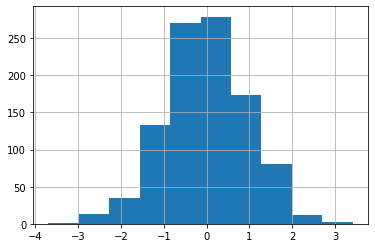

In [5]:
df1['A'].hist()   # creates histigram of columna

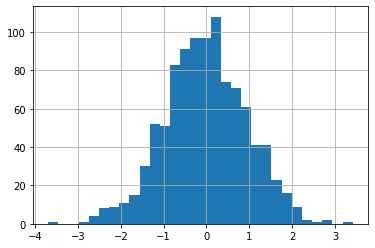

In [6]:
df1['A'].hist(bins = 30)   # matplotlib argument

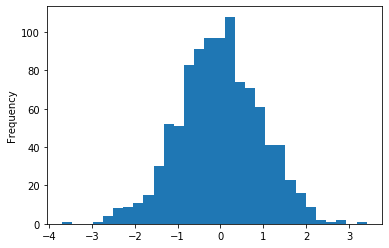

In [8]:
df1['A'].plot(kind = 'hist', bins = 30)   # same as above

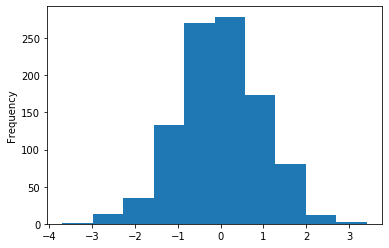

In [9]:
df1['A'].plot.hist()   # same as above

In [13]:
df2 =pd.read_csv('df2')
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


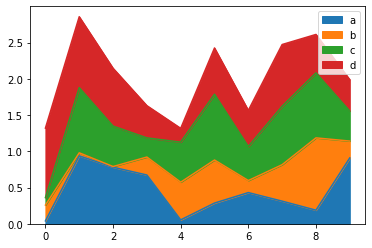

In [15]:
df2.plot.area()    # created a stacked area plot

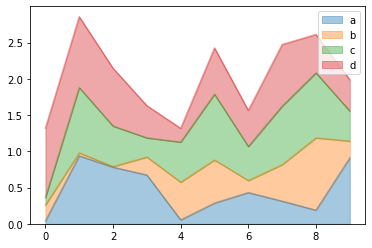

In [16]:
df2.plot.area(alpha = 0.4)

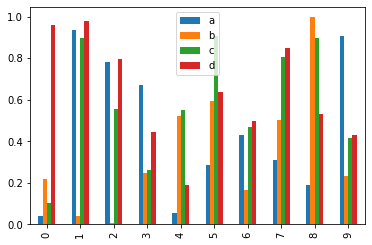

In [17]:
df2.plot.bar()

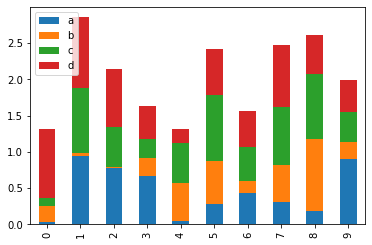

In [20]:
df2.plot.bar(stacked = True)

In [22]:
df1.head()   # time series data

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


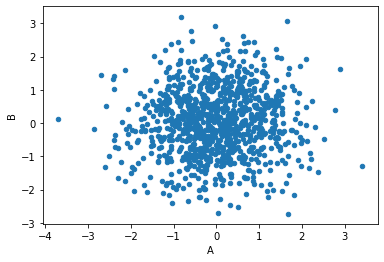

In [26]:
df1.plot.scatter(x = 'A', y = 'B')

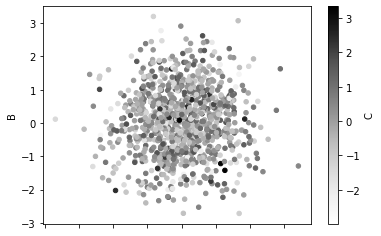

In [28]:
df1.plot.scatter(x = 'A', y = 'B', c='C')   # will plot value of column C as color

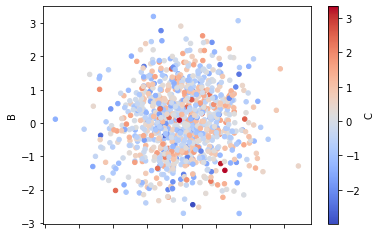

In [29]:
df1.plot.scatter(x = 'A', y = 'B', c='C', cmap='coolwarm')

C:\Users\tarun\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


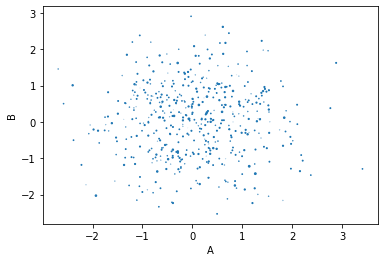

In [30]:
df1.plot.scatter(x = 'A', y = 'B', s=df1['C'])   # will plot C as size instead of color

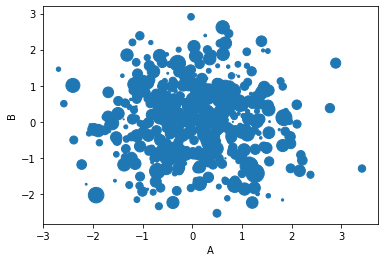

In [32]:
df1.plot.scatter(x = 'A', y = 'B', s=df1['C']*100)    # since size is small

In [33]:
df = pd.DataFrame(np.random.randn(1000,2), columns = ['a','b'])

In [34]:
df.head()

,a,b
0,0.193334,0.934419
1,1.707403,1.324068
2,0.690431,0.176519
3,0.208838,-1.429998
4,1.988238,0.794533


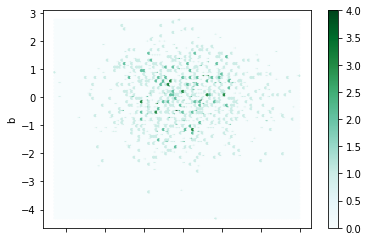

In [35]:
df.plot.hexbin(x='a', y='b')

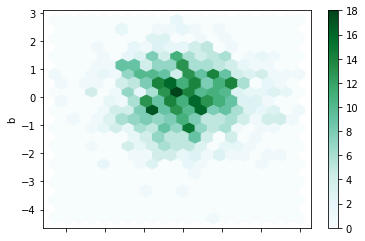

In [36]:
df.plot.hexbin(x='a', y='b', gridsize = 20)

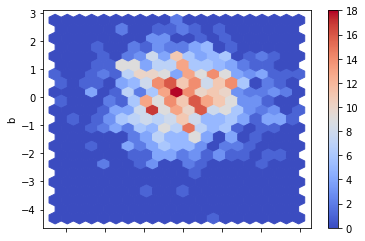

In [38]:
df.plot.hexbin(x='a', y='b', gridsize = 20, cmap='coolwarm')

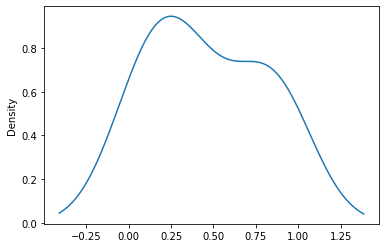

In [39]:
df2['a'].plot.kde()    # kernel density estimation

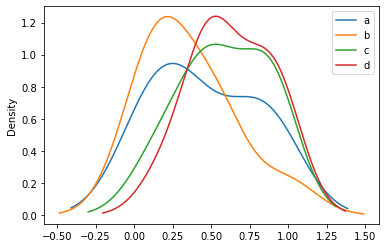

In [40]:
df2.plot.density()   # for all columns